# Análisis Geoespacial Datos de AirBnB, Ciudad de Estocolmo

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# DATA PREPARATION

### Dataset 1. AirBnB Listings

In [42]:
PATH = 'D:/0_DATALAB/0.DATA/geo/AIRBnB/Stockholm'

listings = pd.read_csv(PATH+"/stockholm_listings.csv")
gdf_listings = gpd.GeoDataFrame(listings,crs={'init' :'epsg:4326'}, 
                                geometry=gpd.points_from_xy(listings.longitude, listings.latitude))
print(type(gdf_listings))
print(gdf_listings.shape)
#print(gdf_listings.dtypes)

<class 'geopandas.geodataframe.GeoDataFrame'>
(7710, 17)


In [43]:
listings = gdf_listings[["id", "name","host_name", "neighbourhood", 
              "latitude","longitude","room_type","price",
             "reviews_per_month", "geometry"]]

listings.head(5)

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,reviews_per_month,geometry
0,145320,In the middle of it all - with a view!,Kim,Södermalms,59.31364,18.05256,Private room,1272,2.54,POINT (18.05256 59.31364)
1,155220,"Stockholm, new spacoius villa",Madeleine,Skarpnäcks,59.24667,18.17799,Entire home/apt,1203,NaN,POINT (18.17799 59.24667)
2,155685,Hornstull with water view!,Robert,Södermalms,59.31535,18.03277,Entire home/apt,3209,0.22,POINT (18.03277 59.31535)
3,164448,Double room in central Stockholm with Wi-Fi,Li,Södermalms,59.31268,18.06258,Private room,597,3.13,POINT (18.06258 59.31268)
4,170651,Petit Charm Rooftop next to heaven,Marie,Södermalms,59.31568,18.03138,Entire home/apt,734,0.33,POINT (18.03138 59.31568)


In [87]:
print(type(listings))
print(listings.shape)
print(listings.dtypes)
print('geom. NULLS =',listings["geometry"].isnull().sum())
print('geom. VALID?:',listings['geometry'].is_valid.count() == listings['geometry'].count())

<class 'geopandas.geodataframe.GeoDataFrame'>
(7710, 10)
id                      int64
name                   object
host_name              object
neighbourhood          object
latitude              float64
longitude             float64
room_type              object
price                   int64
reviews_per_month     float64
geometry             geometry
dtype: object
geom. NULLS = 0
geom. VALID?: True


In [86]:
#listings.loc[listings["geometry"]=='NaN']

### Dataset 2. AirBnB Neighbourhoods

In [5]:
neighborhoods = gpd.read_file(PATH+"/stockholm_neighbourhoods.geojson")
neighborhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Kungsholmens,None,"MULTIPOLYGON (((17.97420 59.31400, 17.97834 59..."
1,Östermalms,None,"MULTIPOLYGON (((18.03773 59.37062, 18.03850 59..."
2,Bromma,None,"MULTIPOLYGON (((17.86463 59.34295, 17.86848 59..."
3,Skärholmens,None,"MULTIPOLYGON (((17.86352 59.27468, 17.86779 59..."
4,Södermalms,None,"MULTIPOLYGON (((18.01142 59.32212, 18.01579 59..."


In [88]:
print(type(neighborhoods))
print(neighborhoods.shape)
print(neighborhoods.dtypes)
print('geom. NULLS =',neighborhoods["geometry"].isnull().sum())
print('geom. VALID?:',neighborhoods['geometry'].is_valid.count() == neighborhoods['geometry'].count())

<class 'geopandas.geodataframe.GeoDataFrame'>
(14, 3)
neighbourhood            object
neighbourhood_group      object
geometry               geometry
dtype: object
geom. NULLS = 0
geom. VALID?: True


In [46]:
# Coordinate Reference System (CRS) Match?
listings.crs==neighborhoods.crs

True

In [28]:
#gdf_listings.crs = {'init' :'epsg:4326'}
#gdf_listings.to_file("data/gdf_listings.shp")

### Dataset 3. ?? Areas

In [36]:
areas = gpd.read_file(PATH+"/stockholm_areas.geojson")
areas.head()

,fid,Deso,Total,KOMMUNNAMN,KATEGORI,ADAT,geometry
0,3705.0,0180C3410,1278.0,Eker?,Kommun,None,"MULTIPOLYGON (((17.97999 59.32128, 17.97794 59..."
1,5287.0,0180C4470,1783.0,Solna,Kommun,1912-12-12T12:00:00,"MULTIPOLYGON (((18.01529 59.34032, 18.01584 59..."
2,5288.0,0180C4730,2029.0,Solna,Kommun,1912-12-12T12:00:00,"MULTIPOLYGON (((18.00308 59.34115, 18.00447 59..."
3,5301.0,0180C4580,2254.0,Solna,Kommun,1912-12-12T12:00:00,"MULTIPOLYGON (((17.99797 59.34043, 17.99876 59..."
4,5302.0,0180C4600,1738.0,Solna,Kommun,1912-12-12T12:00:00,"MULTIPOLYGON (((18.01505 59.34042, 18.01505 59..."


In [89]:
print(type(areas))
print(areas.shape)
print(areas.dtypes)
print('geom. NULLS =',areas["geometry"].isnull().sum())
print('geom. VALID?:',areas['geometry'].is_valid.count() == areas['geometry'].count())

<class 'geopandas.geodataframe.GeoDataFrame'>
(787, 7)
fid            float64
Deso            object
Total          float64
KOMMUNNAMN      object
KATEGORI        object
ADAT            object
geometry      geometry
dtype: object
geom. NULLS = 0
geom. VALID?: True


In [45]:
# Coordinate Reference System (CRS) Match?
listings.crs==areas.crs

True

### Dataset 4. Count Listings by 'Deso'

In [84]:
#We want to count listings by 'Deso' in 'areas' df

#sjoined_listings = gpd.sjoin(listings, areas, op="within")
#sjoined_listings.head()

# -----------------------------------------------------------------------------------------------
# D:\Archivos de Programas Externo\Anaconda3\lib\site-packages\geopandas\base.py:105: UserWarning: Cannot generate spatial index: Missing package `rtree`.
#  warn("Cannot generate spatial index: Missing package `rtree`.")
# AttributeError: 'NoneType' object has no attribute 'intersection'
# -----------------------------------------------------------------------------------------------

#joined_listings[["name","host_name", "neighbourhood", 
#              "room_type","price", "reviews_per_month", 
#              "Deso","Total", "KOMMUNNAMN", "Deso", "Total","geometry"]].sample(5)

#grouped = sjoined_listings.groupby("Deso").size()
#df = grouped.to_frame().reset_index()
#df.columns = ['Deso', 'listings_count']
#df.head()

#merged_areas = stockholm_areas.merge(df, on='Deso', how='outer')
#merged_areas.head()

#merged_areas.shape, stockholm_areas.shape
#Out[43]:((787, 8), (787, 7))

# VISUALIZATIONS

### Map 1. Listings by Neighbourhoods (location)

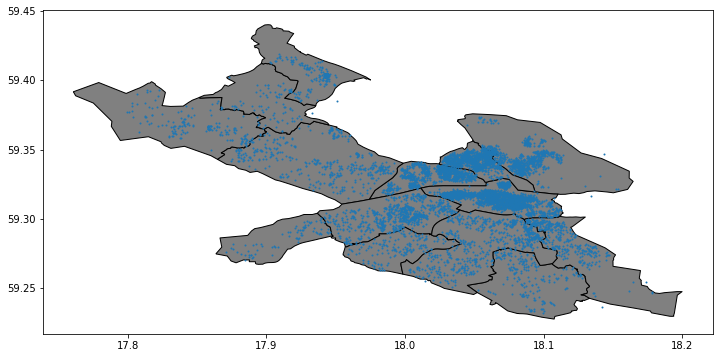

In [32]:
fig, ax = plt.subplots(figsize=(12,10))
neighborhoods.plot(color="Gray", ax= ax, edgecolor="black");
gdf_listings.plot(ax=ax, markersize=1)
#plt.savefig("neighbourhoods.png")

### Map 2. Listings by Area (location)

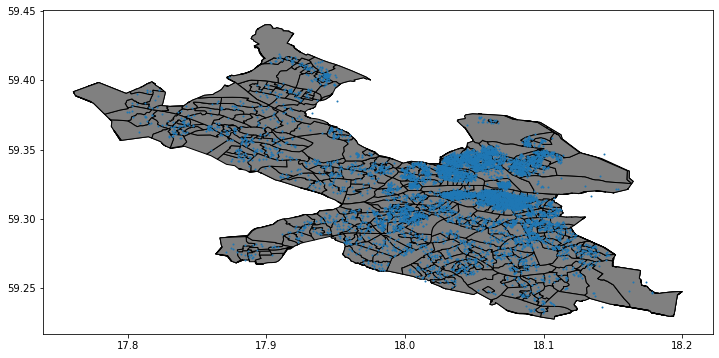

In [39]:
fig, ax = plt.subplots(figsize=(12,10))
stockholm_areas.plot(color="Gray", ax= ax, edgecolor="black");
gdf_listings.plot(ax=ax, markersize=1)
#plt.savefig("neighbourhoods.png")

### Map 3. Number of Listings by Area (measure)

In [ ]:
#merged_areas.plot(column="listings_count", cmap="Blues_r", figsize=(12,10));
#merged_areas.to_file("data/merged_areas.shp")

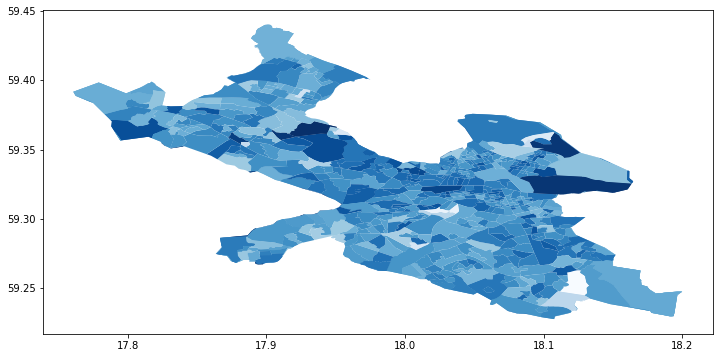

In [85]:
areas.plot(column="Total", cmap="Blues_r", figsize=(12,10));